## fastFMの動作確認
ダミーデータを使い、fastFMの動作確認を行います。その際、ユーザIDと商品IDはダミー変数

In [1]:
import pandas as pd
import numpy as np

ユーザー情報の読み込み

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code'] 
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols) 
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


評価値の読み込み

In [3]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)
ratings['data'] = pd.to_datetime(ratings['unix_timestamp'], unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,data
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


映画情報の読み込み

In [4]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding = "latin1")
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


予測のため、すべての情報のマージ

In [5]:
movie_rating = pd.merge(movies, ratings)
lens = pd.merge(movie_rating, users)

マージしたデータ　映画のタイトルで上位２５を表示

In [6]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

1 位はスターウォーズの 583 件です。上位の映画を見ると 2000 年以前の映画が多いですね。これは、 古い映画の方が評価する人が多くなるという理由が考えられます。

## 映画のタイトルについて、評価の数と平均を集計し、平均値の高い順に並べ替え

In [7]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]}) #agg=集計:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [8]:
movie_stats

rating          
                                                     size      mean
title                                                              
'Til There Was You (1997)                               9  2.333333
1-900 (1994)                                            5  2.600000
101 Dalmatians (1996)                                 109  2.908257
12 Angry Men (1957)                                   125  4.344000
187 (1997)                                             41  3.024390
2 Days in the Valley (1996)                            93  3.225806
20,000 Leagues Under the Sea (1954)                    72  3.500000
2001: A Space Odyssey (1968)                          259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)             5  1.000000
39 Steps, The (1935)                                   59  4.050847
8 1/2 (1963)                                           38  3.815789
8 Heads in a Duffel Bag (1997)                          4  3.250000
8 Seconds (1994)                                        4  3.750000
A Chef in Love (1996)                                   8  4.125000
Above the Rim (1994)                                    5  3.000000
Absolute Power (1997)                                 127  3.370079
Abyss, The (1989)                                     151  3.589404
Ace Ventura: Pet Detective (1994)                     103  3.048544
Ace Ventura: When Nature Calls (1995)                  37  2.675676
Across the Sea of Time (1995)                           4  2.750000
Addams Family Values (1993)                            87  2.816092
Addicted to Love (1997)                                54  3.166667
Addiction, The (1995)                                  11  2.181818
Adventures of Pinocchio, The (1996)                    39  3.051282
Adventures of Priscilla, Queen of the Desert, T...    111  3.594595
Adventures of Robin Hood, The (1938)                   67  3.791045
Affair to Remember, An (1957)                          26  4.192308
African Queen, The (1951)                             152  4.184211
Afterglow (1997)                                       18  3.111111
Age of Innocence, The (1993)                           65  3.384615
...                                                   ...       ...
Window to Paris (1994)                                  1  4.000000
Wings of Courage (1995)                                 1  4.000000
Wings of Desire (1987)                                 57  4.000000
Wings of the Dove, The (1997)                          75  3.680000
Winnie the Pooh and the Blustery Day (1968)            75  3.800000
Winter Guest, The (1997)                                9  3.444444
Wishmaster (1997)                                      27  2.444444
With Honors (1994)                                     46  3.065217
Withnail and I (1987)                                  13  3.230769
Witness (1985)                                          1  4.000000
Wizard of Oz, The (1939)                              246  4.077236
Wolf (1994)                                            67  2.701493
Woman in Question, The (1950)                           1  1.000000
Women, The (1939)                                      15  3.666667
Wonderful, Horrible Life of Leni Riefenstahl, T...     10  4.000000
Wonderland (1997)                                      10  3.200000
Wooden Man's Bride, The (Wu Kui) (1994)                 3  2.666667
World of Apu, The (Apur Sansar) (1959)                  6  4.000000
Wrong Trousers, The (1993)                            118  4.466102
Wyatt Earp (1994)                                      50  3.100000
Yankee Zulu (1994)                                      1  1.000000
Year of the Horse (1997)                                7  3.285714
You So Crazy (1994)                                     1  3.000000
Young Frankenstein (1974)                             200  3.945000
Young Guns (1988)                                     101  3.207921
Young Guns II (1990)                   

In [9]:
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()# sort_values:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

すると、評価件数が 1 件と少ないため評価の平均が高くなる映画が上位に来てしまいま した。これを防ぐためにはどうすればよいでしょうか。

1つの方法として、評価数が少ないと平均にノイズが乗りやすいので、評価数が多いもののみで平均する

In [10]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

今度は想像していたランキングになりました。評価回数の分布はどうなっているでしょうか。ヒストグラムを見てみましょう。

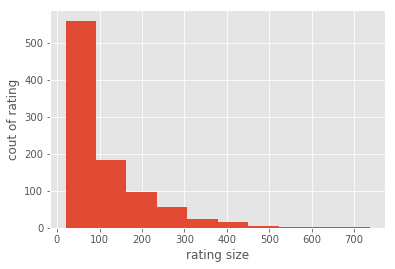

In [11]:
from matplotlib import pyplot as plt
plt.style.use('ggplot') #  easy-to-switch plotting “styles” with the same parameters like R

plt.xlabel('rating size')
plt.ylabel('cout of rating')
plt.show(lens.groupby('user_id').size().sort_values(ascending=False).hist())

テールにしたがって頻度が低くなるいわゆるロングテールな分布になっています。これをジップの法 則(Zipf’ s law)に従っていると言います

## つぎに、ユーザーごとの評価数と評価値の平均について調べる

In [12]:
user_stats = lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats['rating'].describe() # describe:データセットの分布の中心的傾向、分散および形状を要約する記述統計を生成(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


特に評価値の平均に着目をすると、最低が平均 1.49 点の辛口のユーザーから 4.87 点の甘めのユー ザーまで、ユーザーごとにバイアスがあることが分かります。

# 推薦システムの実装
今回は、Matrix Factorizationを一般化したアルゴリズムであるFactorization Machineを使います。

Factorization Machineには以下のような特徴があります。

● Matrix Factorizationではユーザーとアイテムの情報しか扱えなかったが、Factorization Machine はそれ以外の特徴量も扱うことができる

● ロジスティック回帰などと異なり、Matrix Factorizationと同じく疎な行列を扱うことができる

● 特徴量の間で影響を与え合う交互作用(Interaction)を考慮することができるので、相関関係があ
る特徴量も適切に扱うことができる

カテゴリカルなデータをダミー変数として表現することで、カテゴリ同士の交互作用の影響を扱います。

Factorization Machineの各種ライブラリでは、回帰、分類、順位を学習するランク学習(Learning to Rank)を行えます。

In [13]:
%%bash 
pip install fastFM

fastFMは評価値の回帰、二値分類、ランキング学習ができます。
fastFMの利用するアルゴリズムには
Alternated Least Squared(ALS)か
確率的勾配法(SGD)、 
MCMC(Markov Chain Monte Carlo Methods、マルコフチェインモンテカルロ法)があります。

それぞれのアルゴリズムの長所と短所は以下のとおりです。

● `ALS`

-長所:予測が速い、パラメータがSGDより少ない 

-短所:正則化が必須

● `SGD`

-長所:予測が速い、大きなデータに対しても高速に学習ができる 

-短所:正則化が必須、ハイパーパラメータの数が多い

● MCMC

-長所:ハイパーパラメータの数が少ない、自動で正則化できる 

-短所:学習に一定の時間が必要


まず、手始めに ALS を使って学習と予測をしてみましょう。
fastFMの入力は、ユーザー IDとアイテムIDについてはカテゴリカル変数として考え、ダミー変数 に変換する必要があります。この変換のために scikit-learn の DictVectorizerクラスを使います。

In [14]:
#user_id,item_idをカテゴリカル変数なので、ダミー変数に変換するため
from sklearn.feature_extraction import DictVectorizer # 特徴量のリストをベクターでマッピング：http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

In [15]:
# 入力データの生データ(ラベルである点数は含まれない)
# ユーザー ID、評価したアイテムID、ユーザーの年齢の含まれる辞書
train = [
    {"user": "1", "item": "5", "age": 19},
    {"user": "2", "item": "43", "age": 33}, 
    {"user": "3", "item": "20", "age": 55}, 
    {"user": "4", "item": "10", "age": 20},
]

In [16]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,data,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [17]:
# DictVectorizer()を使い、age以外のフィールドをダミー変数へ変換する
v = DictVectorizer()
X = v.fit_transform(train) # fit_transform:(http://scikit-learn.org/stable/modules/preprocessing.html)
print(X.toarray())

[[ 19.   0.   0.   0.   1.   1.   0.   0.   0.]
 [ 33.   0.   0.   1.   0.   0.   1.   0.   0.]
 [ 55.   0.   1.   0.   0.   0.   0.   1.   0.]
 [ 20.   1.   0.   0.   0.   0.   0.   0.   1.]]


user, itemはstringとして渡したため、ダミー変数に変換された

このように、ユーザー IDとアイテムIDを文字列で表現することで、カテゴリカル変数として扱いま す

### 試しにALSを使って回帰

In [18]:
from fastFM import als
import numpy as np

先程のダミーデータに対して、１９歳のユーザーは５点、３３歳のユーザーは１点、５５歳に２点、３３歳に４点をつけたとする

In [19]:
y = np.array([5.0, 1.0, 2.0, 4.0])

ALSで回帰のFMモデルを初期化、学習する

In [20]:
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X, y)

FMRegression(init_stdev=0.1, l2_reg=0, l2_reg_V=0.5, l2_reg_w=0.1,
       n_iter=1000, random_state=123, rank=2)

24歳のユーザーID　５がアイテムID　１０の評価値を予測した場合のrateを予測する

In [21]:
fm.predict(v.transform({"user":"5", "item":"10", "age":24}))

array([ 3.60775939])

年齢も近く同じ商品を評価しているユーザー４の評価値に近い５段階評価のうち、3.6という評価を予測することができました

## Factorization Machineで学習する

全体の傾向が分かったので、MovieLens のデータには、 ユーザーをうまく分けた開発データとテストデータが提供されています。まずは、それを使って評価値 の予測をしてみましょう。

In [22]:
# データを読み込む関数を定義して、開発データ ua.baseとテストデータ ua.testを読み込み
def load_data(filename, path="ml-100k/"):
    data = []
    y = []
    with open(path+filename) as f:
        for line in f:
            (user, movieid, rating, ts) = line.split('\t')
            data.append({"user_id": str(user), "movie_id": str(movieid)})
            y.append(float(rating))
            
        return (data, np.array(y))
    
(dev_data, y_dev) = load_data("ua.base")
(test_data, y_test) = load_data("ua.test")

このとき、Factorization Machineではユーザー IDと映画のIDをカテゴリカル変数として扱うため 文字列型に変換し、DictVectorizerクラスを使ってダミー変数にしています。

次に開発データを訓練データと検証データに分けます。パラメータの調整には訓練データと検証デー タを使い、最終的な評価にはテストデータを使います。

In [32]:
#誤植を発見：from sklearn.feature_selection import train_test_split
from sklearn.model_selection import train_test_split

v = DictVectorizer()
X_dev = v.fit_transform(dev_data)
X_test = v.transform(test_data)
np.std(y_test)
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

X_train が訓練データ、y_train がその評価値、X_dev_test が検証データ、y_dev_test がその評価 値になります。

train_test_split() 関数を使って 9:1 にデータを分割しています。
デ
ータが準備できたので、Factorization Machineを使って学習してみましょう。

ここでは、ハイ パーパラメータの少なさから MCMC を使って学習をします。

fastFM で MCMC を使って学習すると きには、その特性上学習と予測を同時にしなければいけない制約があります。つまり、fit()関数と predict()関数が分離できず、fit_predict()という関数でしか学習と予測ができません。そのため、オンラインで予測したいときなど予測時間がネックになる場合は、最適化手法として SGD を使うほう が良いでしょう。

MCMC で学習をして、イテレーションの回数に対する平均二乗誤差と MCMC のハイパーパラメー タ(alpha,lambda_w,mu_w)の推移を見てみましょう。

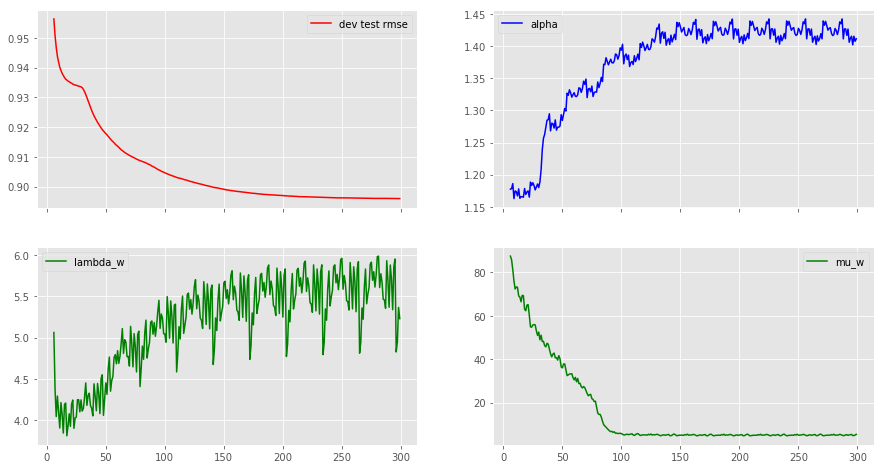

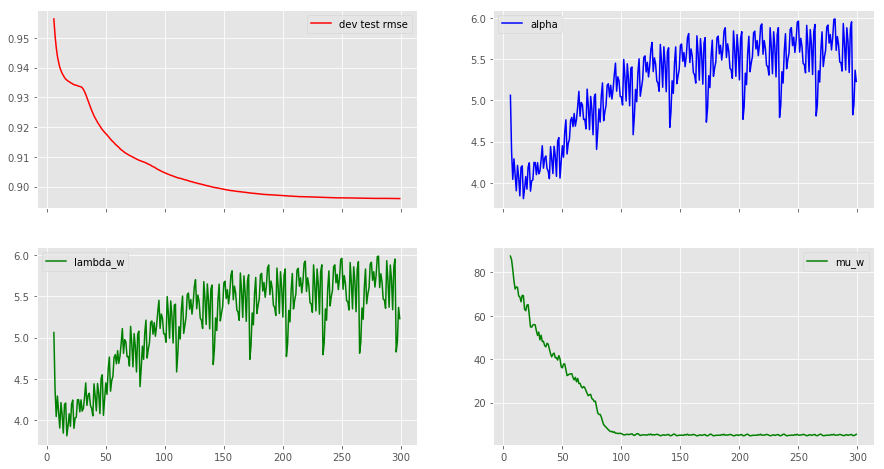

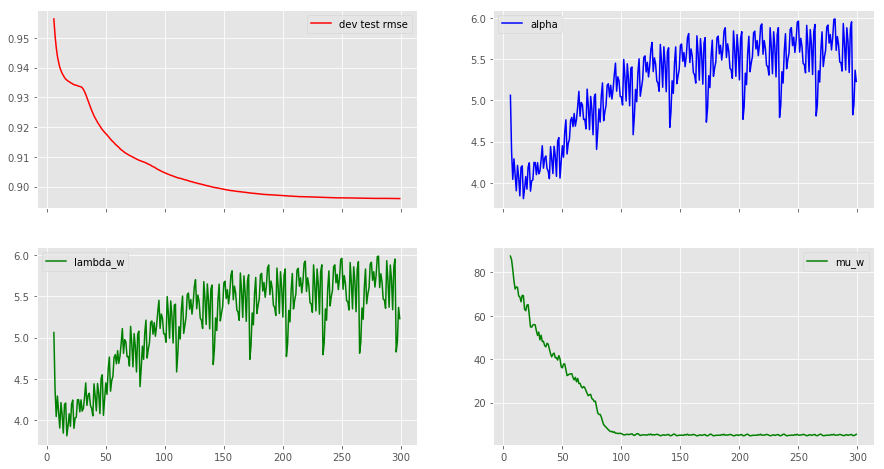

In [38]:
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

# fastFMのパラメータの指定
n_iter = 300
step_size = 1
seed= 123
rank = 4

# MCMCを使った回帰のFMモデルを初期化する
fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
# Allocates and initalizes the model and hyper parameter.
fm.fit_predict(X_train, y_train, X_dev_test)

rmse_dev_test = []
rmse_test = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)

# イテレーション回数を変化させて、予測結果の性能とハイパーパラメータを得る
for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_dev_test)))
    hyper_param[nr, :] = fm.hyper_param_
    
# 最初の5回は値が落ち着いていないので無視する
values = np.arange(1, n_iter)
x = values * step_size
burn_in = 5
x = x[burn_in:]

# RMSEとハイパーパラメータをプロット
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

axes[0, 0].plot(x, rmse_test[burn_in:], label='dev test rmse', color="r")
axes[0, 0].legend()
axes[0, 1].plot(x, hyper_param[burn_in:, 1], label="alpha", color="b")
axes[0, 1].legend()
axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g") 
axes[1, 0].legend()
axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g") 
axes[1, 1].legend()

plt.show()

In [36]:
print(np.min(rmse_test))

0.895969274557


およそ 100 回イテレーションを繰り返すと、どのパラメータも収束して来ているのが分かります。標 準偏差は、回帰問題における平均二乗誤差のベンチマークとなります。常に平均値を出力する予測モ デルがあったとき、その平均二乗誤差は標準偏差に等しくなることが知られています。検証データの 標準偏差は 1.12 なのに対し、今回の予測した評価値の平均二乗誤差は 0.89 と低い値になっています。

次に、行列を圧縮する次数であるrank(Matrix Factorizationにおけるdと同じようなハイパーパラ メータ)を大きくした時に性能がどう変わっていくかを見てみましょう。

In [43]:
n_iter = 100
rank = 4
seed = 333
step_size = 1

fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
# initalize coefs
fm.fit_predict(X_train, y_train, X_dev_test)

rmse_test = []
rmse_new = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)
for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_dev_test)))
    hyper_param[nr, :] = fm.hyper_param_

In [53]:
print('------- restart ----------')
values = np.arange(1, n_iter)
rmse_test_re = []
hyper_param_re = np.zeros((len(values), 3 + 2 * rank), dtype=np.float64)
for nr, i in enumerate(values):
    fm = mcmc.FMRegression(n_iter=i, rank=rank, random_state=seed)
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_dev_test))
    rmse_test_re.append(rmse)
    hyper_param_re[nr, :] = fm.hyper_param_
    if i % 10 == 0:
        print('iter:{} rmse:{:.3f}'.format(i, rmse))

from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

x = values * step_size
burn_in = 5
x = x[burn_in:]

#with plt.style.context('ggplot'):
axes[0, 0].plot(x, rmse_test[burn_in:], label='test rmse', color="r")
axes[0, 0].plot(values[burn_in:], rmse_test_re[burn_in:], ls="--", color="r")
axes[0, 0].legend()

axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
axes[0, 1].plot(values[burn_in:], hyper_param_re[burn_in:,0], ls="--", color="b")
axes[0, 1].legend()

axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
axes[1, 0].plot(values[burn_in:], hyper_param_re[burn_in:,1], ls="--", color="g")
axes[1, 0].legend()

axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
axes[1, 1].plot(values[burn_in:], hyper_param_re[burn_in:,3], ls="--", color="g")
axes[1, 1].legend()

print("min rmse: {:.3f}".format(np.min(rmse_test_re)))

------- restart ----------
iter:10 rmse:0.943
iter:20 rmse:0.935
iter:30 rmse:0.933
iter:40 rmse:0.927
iter:50 rmse:0.917
iter:60 rmse:0.909


KeyboardInterrupt: 

rank は 32 になると平均二乗誤差の変化が落ち着いてくることが分かりました。rank が大きくなれ ばなるほど、考慮すべき交互作用が増えて学習対象となる重みの個数が増えるため、学習時間も長く なります。適当なサイズを見極めるのが重要です。
それでは、テストデータで評価してみましょう。

In [ ]:
fm = mcmc.FMRegression(n_iter=300, rank=32, random_state=seed) 
y_pred = fm.fit_predict(X_train, y_train, X_test) 
np.sqrt(mean_squared_error(y_pred, y_test))

0.92149684006279797

平均二乗誤差が 0.921 となりました。ここで、データの傾向を調べた時、ユーザーごとに評価値のバ ラ付きがあったのを思い出してみてください。これに対処をするためには、評価値の標準化をすると良 さそうです。今回はシンプルに StandardScalerクラスを使ってみましょう。StandardScalerクラスは 平均を 0 に、標準偏差を 1 に合わせるように標準化します。

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1)).ravel() 
fm = mcmc.FMRegression(n_iter=300, rank=32, random_state=seed)
y_pred = fm.fit_predict(X_train, y_train_norm, X_test) 
np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred), y_test))

標準化の結果、平均二乗誤差が 0.920 と僅かですが小さくなりました。

最後に、ユーザー IDと映画ID以外の情報を加えてみましょう。用意するデータとしては、映画の 公開年、ユーザーの年齢、性別、評価年を加えてみます。まずは、各特徴量の前処理をします。

In [ ]:
lens['user_id'] = lens['user_id'].astype(str)
lens['movie_id'] = lens['movie_id'].astype(str)
lens['year'] = lens['date'].apply(str).str.split('-').str.get(0)
lens['release_year'] = lens['release_date'].apply(str).str.split('-').str.get(2)
lens['year'] = lens['date'].apply(str).str.split('-').str.get(0)
lens['release_year'] = lens['release_date'].apply(str).str.split('-').str.get(2)

ユーザー ID、映画IDはダミー変数に変換をするため文字列に変換しています。映画の公開年と評 価年をそれぞれリリース日と評価日から抽出しています。これらの特徴量の組み合わせ候補を作って みます。

In [ ]:
candidate_columns = [
['user_id', 'movie_id', 'release_year', 'age', 'sex', 'year', 'rating'], #A ['user_id', 'movie_id', 'age', 'sex', 'year', 'rating'], #B
['user_id', 'movie_id', 'sex', 'year', 'rating'], #C
['user_id', 'movie_id', 'age', 'sex', 'rating'], #D
['user_id', 'movie_id', 'rating'], #E
]

それぞれの組み合わせを A から E と名付けた時、どの組み合わせが良いか実際に学習してみましょ う。

In [ ]:
rmse_test = []
# カラム候補郡ごとに評価を行う
for column in candidate_columns:
    # 欠損値を落とす
    filtered_lens = lens[column].dropna()
    # 入力データをダミー変数に変換する
    v = DictVectorizer()
    X_more_feature = v.fit_transform(
    list(filtered_lens.drop('rating', axis=1).T.to_dict().values())) # 教師となるレーティングを代入する
    y_more_feature = filtered_lens['rating'].tolist()
    # 教師データの学習用と評価用の分割
    X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(
    X_more_feature, y_more_feature, test_size=0.1, random_state=42)
    # ratingの正規化をする
    scaler = StandardScaler()
    y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train)).ravel()
    # MCMCを使ったモデルの学習
    fm = mcmc.FMRegression(n_iter=500, rank=8, random_state=123) 
    fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)
    # テストデータでの予測結果のRMSEの取得
    y_pred = fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)
    rmse(mean_squared_error(scaler.inverse_transform(y_pred), y_mf_test))
    rmse_test.append(rmse)
# RMSEをプロットする
ind = np.arange(len(rmse_test))
bar = plt.bar(ind, height=rmse_test) 
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E')) 
plt.ylim((0.88, 0.90))

予測結果の平均二乗誤差を図7-12に図示します。結果より、Cのユーザー ID、映画ID、性別、評 価年の組み合わせが良いことが分かりました。平均二乗誤差も 0.885 と低めにおさえられています。
このように、Factorization Machineは気軽に特徴量の組み合わせを様々なものに変えること ができ、どのような文脈を加えればより良い性能になるかをとても簡単に検証できます。こうした ユーザーとアイテム以外の情報を使ったレコメンドをContext-Aware Recommendationと呼びます [contextawarerecom]。
今回の予測結果を DB に格納することで、Web アプリケーションから参照して利用しましょう。なお、 MCMC の制約としてリアルタイム処理で予測するのは難しいですが、リアルタイムに予測したい場合 は SGD を使ったモデルを構築すれば、リアルタイム処理でも評価値を得られます。